# true color

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:

/bin/rm -rf 1838 
download_chandra_obsid 1838 evt2
mv -fv 1838/primary/*fits.gz .
gunzip -f *fits.gz



  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits        3 Mb  ####################          < 1 s  59746.7 kb/s

'1838/primary/acisf01838N004_evt2.fits.gz' -> './acisf01838N004_evt2.fits.gz'


## Make images

In [3]:
dmcopy "acisf01838N004_evt2.fits[energy=200:1500][bin x=3773:4380,y=4006:4509]" soft_img.fits clob+

In [4]:
dmcopy "acisf01838N004_evt2.fits[energy=1500:2500][bin x=3773:4380,y=4006:4509]" med_img.fits clob+

In [5]:
dmcopy "acisf01838N004_evt2.fits[energy=2500:8000][bin x=3773:4380,y=4006:4509]" hard_img.fits clob+

## Make 3-color

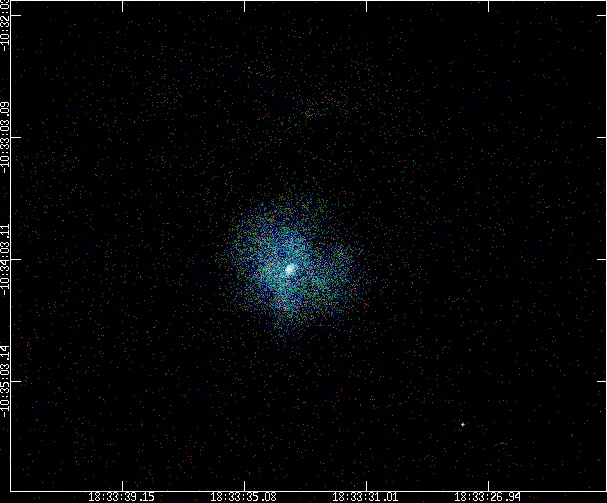

In [6]:
punlearn dmimg2jpg
pset dmimg2jpg infile=soft_img.fits
pset dmimg2jpg greenfile=med_img.fits
pset dmimg2jpg bluefile=hard_img.fits
pset dmimg2jpg outfile=truecolor_1838.jpg
#pset dmimg2jpg maxred=1 maxblue=1 maxgreen=1
pset dmimg2jpg showgrid=yes
pset dmimg2jpg gridsize=60
pset dmimg2jpg fontsize=1
pset dmimg2jpg scalefun=log
dmimg2jpg mode=h clob+

display < truecolor_1838.jpg


## Virtual file names

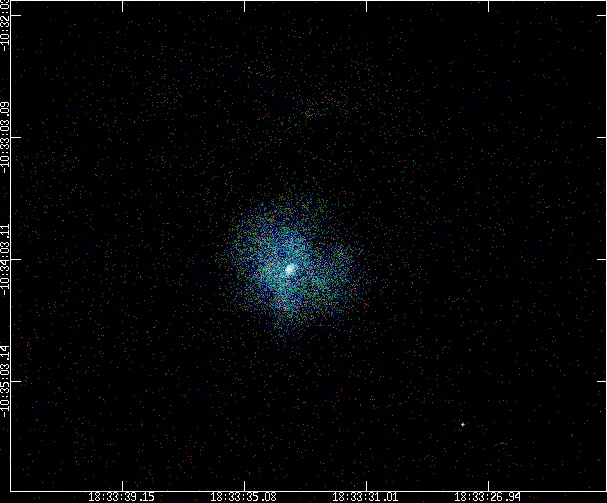

In [7]:
punlearn dmimg2jpg
pset dmimg2jpg infile="acisf01838N004_evt2.fits[energy=200:1500][bin x=3773:4380,y=4006:4509]"
pset dmimg2jpg greenfile="acisf01838N004_evt2.fits[energy=1500:2500][bin x=3773:4380,y=4006:4509]"
pset dmimg2jpg bluefile="acisf01838N004_evt2.fits[energy=2500:8000][bin x=3773:4380,y=4006:4509]"
pset dmimg2jpg outfile=virtual_1838.jpg
pset dmimg2jpg showgrid=yes
pset dmimg2jpg gridsize=60
pset dmimg2jpg fontsize=1
dmimg2jpg mode=h clob+

display < virtual_1838.jpg

In [8]:
vtpdetect infile=hard_img.fits outfile=vtp_src.fits mode=h clob+

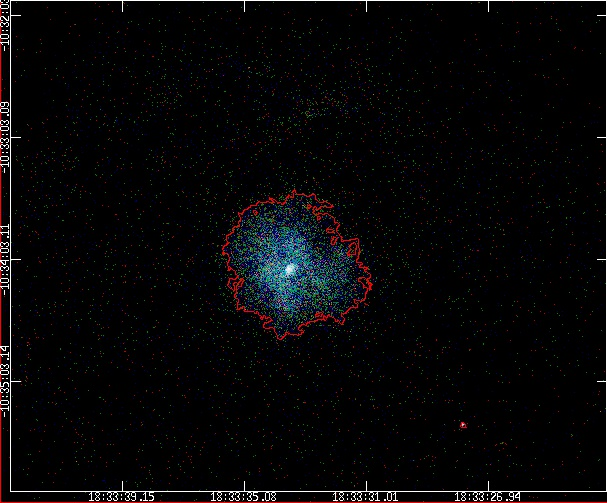

In [9]:
pset dmimg2jpg infile=soft_img.fits
pset dmimg2jpg greenfile=med_img.fits
pset dmimg2jpg bluefile=hard_img.fits
pset dmimg2jpg outfile=overlay_1838.jpg
pset dmimg2jpg showgrid=yes
pset dmimg2jpg gridsize=60
pset dmimg2jpg fontsize=1
pset dmimg2jpg scalefun=log
pset dmimg2jpg regionfile="region(vtp_src.fits[src_region])"
pset dmimg2jpg regioncolor=")colors.red"
dmimg2jpg mode=h clob+

display < overlay_1838.jpg


# Cleanup


In [10]:
/bin/rm -rf 1838
/bin/rm -f acisf*
